In [9]:
import csv
import httplib2
from apiclient.discovery import build
import urllib
import json


# This API key is provided by google as described in the tutorial
API_KEY = ''

# This is the table id for the fusion table
TABLE_ID = '1-fFaNY4vYfMCqRe74Mx23qFJvq1dND_AVSYfY0C2'

try:
    fp = open("dat.json")
    response = json.load(fp)
except IOError:
    service = build('fusiontables', 'v1', developerKey=API_KEY)
    query = "SELECT * FROM " + TABLE_ID
    response = service.query().sql(sql=query).execute()
    fp = open("dat.json", "w+")
    json.dump(response, fp)

In [10]:
print len(response['rows'])

56


In [11]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [12]:
data_df = pd.DataFrame(response[u'rows'], columns = response[u'columns'])

In [13]:
data_df.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


In [24]:
x = data_df['fatalities_85_99']
y = data_df['fatalities_00_14']

In [17]:
x

0       0
1     128
2       0
3      64
4       0
5      79
6     329
7       0
8       0
9      50
10      1
11    101
12      0
13    323
14      0
15      0
16    535
17     16
18     47
19    407
20    282
21      4
22    167
23      0
24    260
25      0
26      0
27    148
28    520
29      0
30      3
31    425
32     21
33      2
34     34
35    234
36     74
37      0
38     51
39      0
40    313
41      6
42    159
43      0
44     14
45    229
46      3
47     98
48      0
49    308
50     64
51    319
52    224
53    171
54      0
55     82
Name: fatalities_85_99, dtype: object

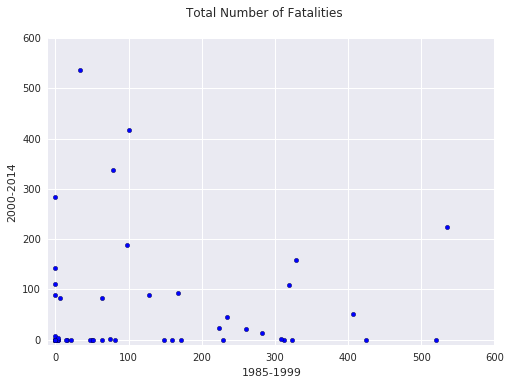

In [43]:
plt.scatter(x,y)
plt.axis([-10, 600, -10, 600])
plt.xlabel('1985-1999')
plt.ylabel('2000-2014')
plt.suptitle('Total Number of Fatalities')
plt.show()
plt.savefig('fatalities.png')

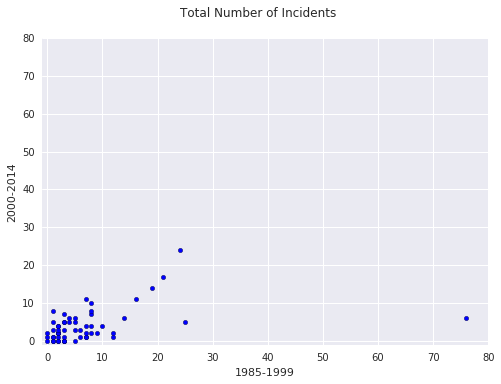

In [46]:
x2 = data_df['incidents_85_99']
y2 = data_df['incidents_00_14']
plt.scatter(x2,y2)
plt.axis([-1, 80, -1, 80])
plt.xlabel('1985-1999')
plt.ylabel('2000-2014')
plt.suptitle('Total Number of Incidents')
plt.show()
plt.savefig('incidents.png')

In [60]:
ask = []
for i in data_df['avail_seat_km_per_week']:
  ask.append(float(i)*782.143 / 1000000000000)

[0.250994955650962, 0.936751019817474, 0.301753622657664, 0.46683911043525905, 1.458895204457686, 2.349559653282523, 0.679880580921936, 0.5554582618928311, 0.755039221074539, 0.545945589223214, 1.440108422901311, 4.08932309497962, 0.28019476988068903, 0.310450204192509, 2.4870277702801364, 2.019852466626329, 0.636051582791641, 0.32692217253323, 0.43056307875950106, 5.103998424329842, 0.43620106584641305, 0.262368323053289, 0.38212428699794904, 0.39612801538785003, 0.479732622033095, 0.235722071189966, 0.386283060214685, 0.917612612579018, 1.231263222348933, 0.21697803922354203, 1.4661753688195391, 1.356644713842515, 0.7836806078844131, 2.680036065847072, 0.812780514295892, 0.272626217662591, 0.323030657579594, 1.499703657832712, 0.23128386096147702, 0.534181653238836, 0.672387923949843, 1.859042694176115, 0.509568074493206, 2.5627116953251097, 0.254652445597568, 0.6199275578037571, 0.202867046960478, 1.1804068101493779, 0.484248785325822, 1.33183486022175, 1.522127157964042, 5.58394670

In [63]:
x3=[]
for i in range(len(data_df['fatalities_85_99'])):
  a=float(data_df['fatalities_85_99'][i])/ask[i]
  x3.append(a)


[0.0, 136.64249869185176, 0.0, 137.09219850995214, 0.0, 33.62332166779876, 483.9085116298914, 0.0, 0.0, 91.58421825724673, 0.6943921611022539, 24.698464184450398, 0.0, 1040.4245049222416, 0.0, 0.0, 841.1267489530898, 48.94131186031342, 109.15938295362459, 79.74140392753732, 646.4908549748766, 15.245742906195156, 437.0305831958185, 0.0, 541.9685634429579, 0.0, 0.0, 161.288105646276, 422.3304899889513, 0.0, 2.046139952832101, 313.27288247506175, 26.79663090897528, 0.7462586140115488, 41.83171151618225, 858.3180370774327, 229.08042398968456, 0.0, 220.50825244782055, 0.0, 465.50508843366487, 3.2274675663966192, 312.02896719566746, 0.0, 54.97689200332464, 369.3980000038839, 14.788010398674812, 83.02222518319623, 0.0, 231.2599025593294, 42.04642146034944, 57.12805237388832, 116.62420264027983, 349.7606337285897, 0.0, 243.55211192249686]


In [64]:
y3=[]
for i in range(len(data_df['fatalities_00_14'])):
  a=float(data_df['fatalities_00_14'][i])/ask[i]
  y3.append(a)


[0.0, 93.94171785064809, 0.0, 0.0, 0.0, 143.431131671496, 232.39375330554054, 12.602207006780583, 116.55023678738466, 0.0, 0.0, 101.72832773001352, 0.0, 0.0, 0.0, 0.0, 353.74489441952375, 0.0, 0.0, 9.992166094114014, 32.0952906725116, 0.0, 240.75936319769644, 0.0, 45.85887844517336, 606.6466295587475, 0.0, 0.0, 0.0, 1304.2794607819214, 0.0, 0.0, 0.0, 0.0, 660.6949730644079, 168.72918677590556, 3.0956814052660078, 0.0, 0.0, 205.92245977197254, 0.0, 44.64663466848656, 0.0, 0.0, 0.0, 0.0, 14.788010398674812, 159.26712586164172, 0.0, 0.7508438394783422, 55.18592816670864, 19.520243601109176, 11.974806521100161, 0.0, 0.0, 0.0]


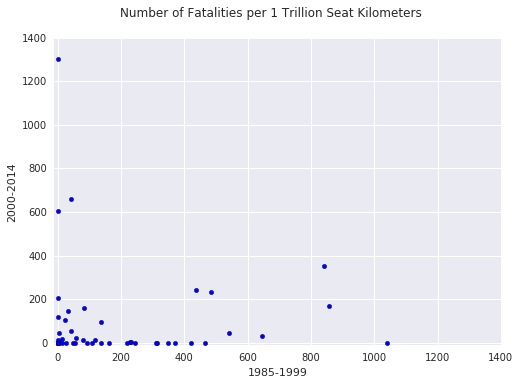

In [68]:
plt.scatter(x3,y3)
plt.axis([-10, 1400, -10, 1400])
plt.xlabel('1985-1999')
plt.ylabel('2000-2014')
plt.suptitle('Number of Fatalities per 1 Trillion Seat Kilometers')
plt.show()
plt.savefig('fatalitiesperask.png')

In [69]:
x4=[]
for i in range(len(data_df['incidents_85_99'])):
  a=float(data_df['incidents_85_99'][i])/ask[i]
  x4.append(a)

In [70]:
y4=[]
for i in range(len(data_df['incidents_00_14'])):
  a=float(data_df['incidents_00_14'][i])/ask[i]
  y4.append(a)

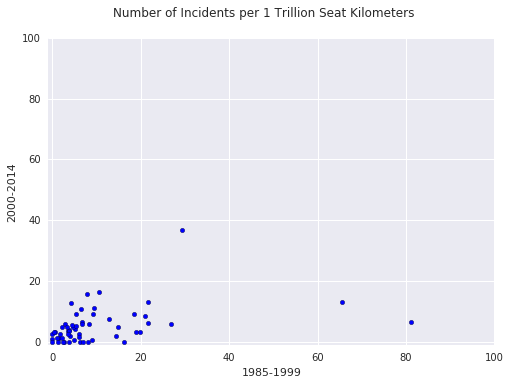

In [72]:
plt.scatter(x4,y4)
plt.axis([-1, 100, -1, 100])
plt.xlabel('1985-1999')
plt.ylabel('2000-2014')
plt.suptitle('Number of Incidents per 1 Trillion Seat Kilometers')
plt.show()
plt.savefig('incidentsperask.png')